In [1]:
#importing the necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
#The Target Variable of the Abalone Age Prediction is the Abalone Age which is calculated using the given (Rings + 1.5) and then assigning it to the dataset

df['Abalone_Age'] = df['Rings'] + 1.5
df = df.drop('Rings', axis = 1,)

# Vizualizations

### 1.Univariate Analysis

In [8]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 4177 observations with 9 features.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Abalone_Age     4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [12]:
#Numerical and Ctegorical Features

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [14]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [15]:
categorical_features

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Abalone_Age'}>]], dtype=object)

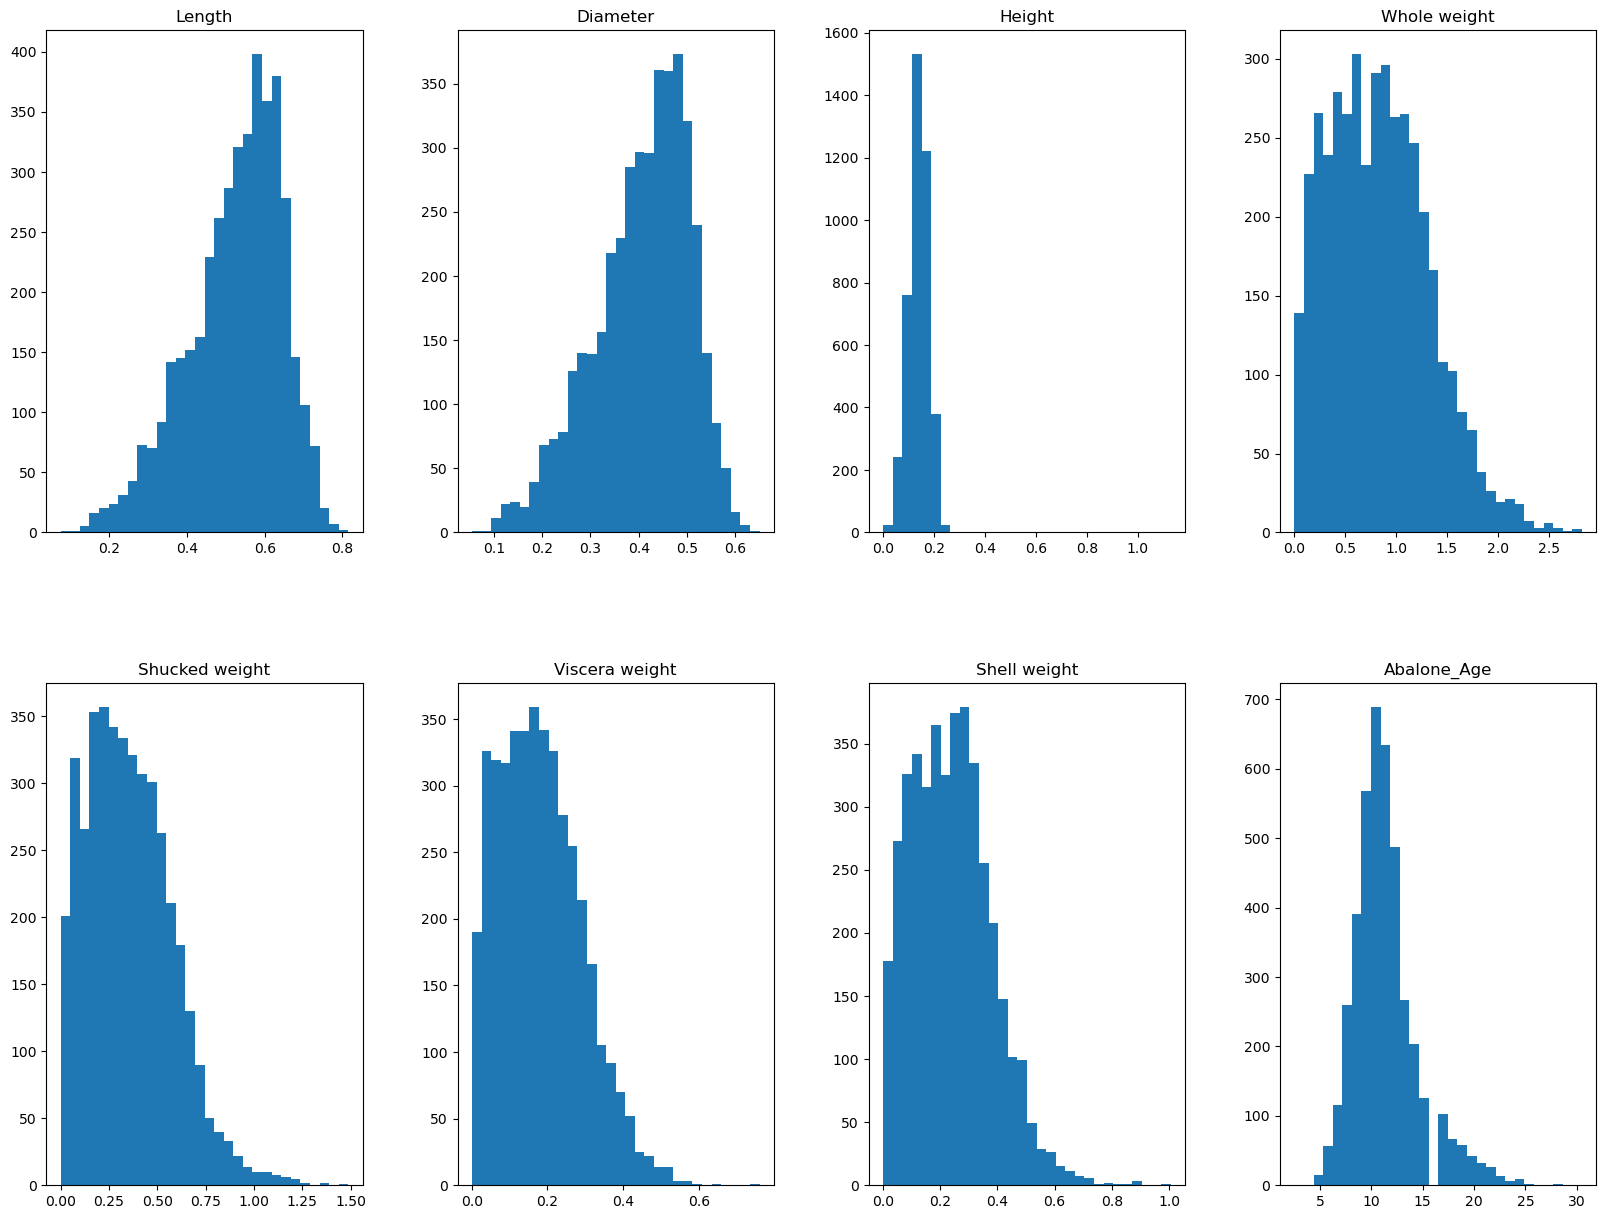

In [16]:
df.hist(figsize=(20,15), grid=False, layout=(2, 4), bins = 30)

In [17]:
from scipy.stats import skew
skew_values = skew(df[numerical_features], nan_policy = 'omit')

temp = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),  pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
temp.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Abalone_Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<AxesSubplot:xlabel='Sex', ylabel='count'>

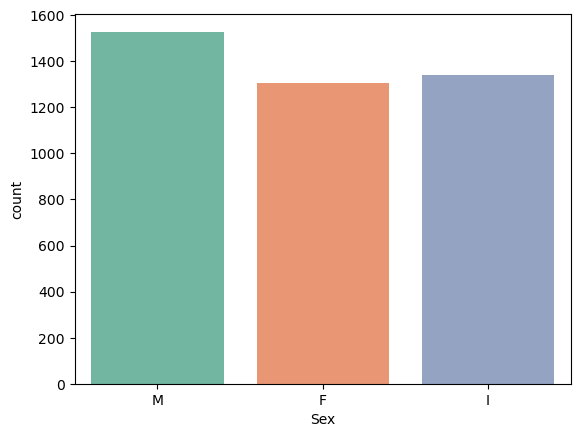

In [18]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

### 2.Bivariate Analysis

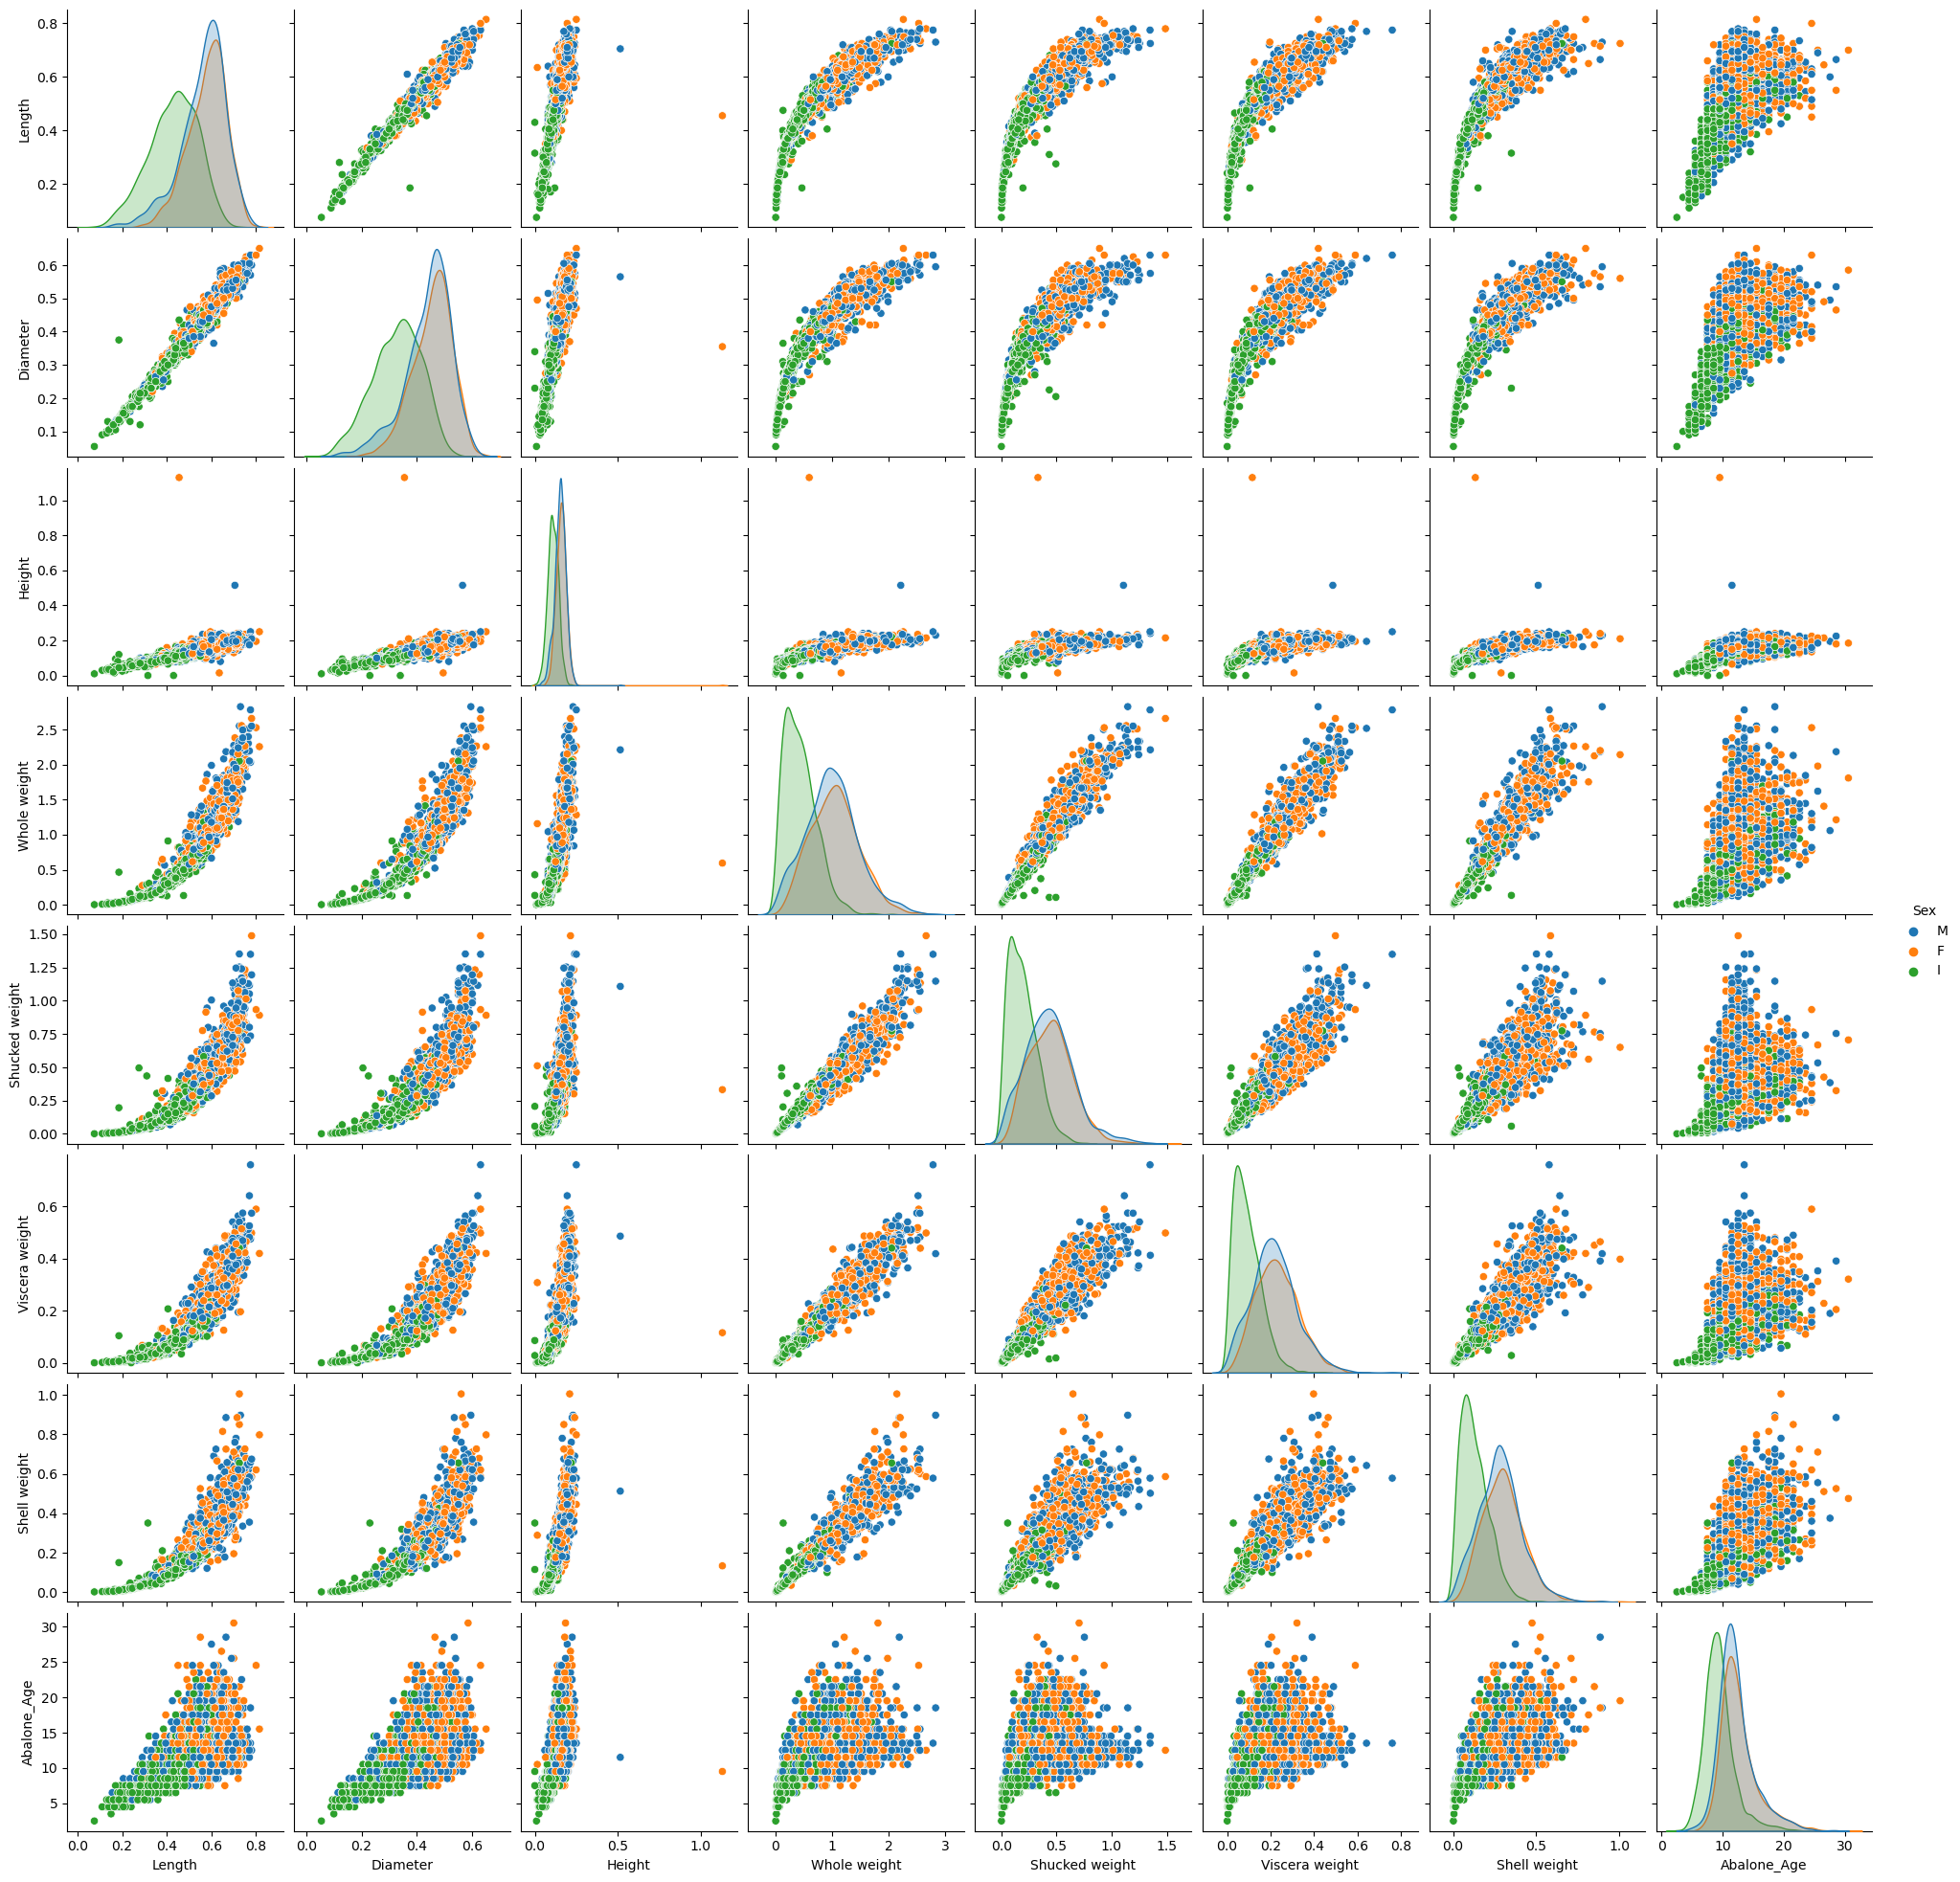

In [21]:
sns.pairplot(df,hue='Sex',diag_kind='kde')
plt.show()

<AxesSubplot:>

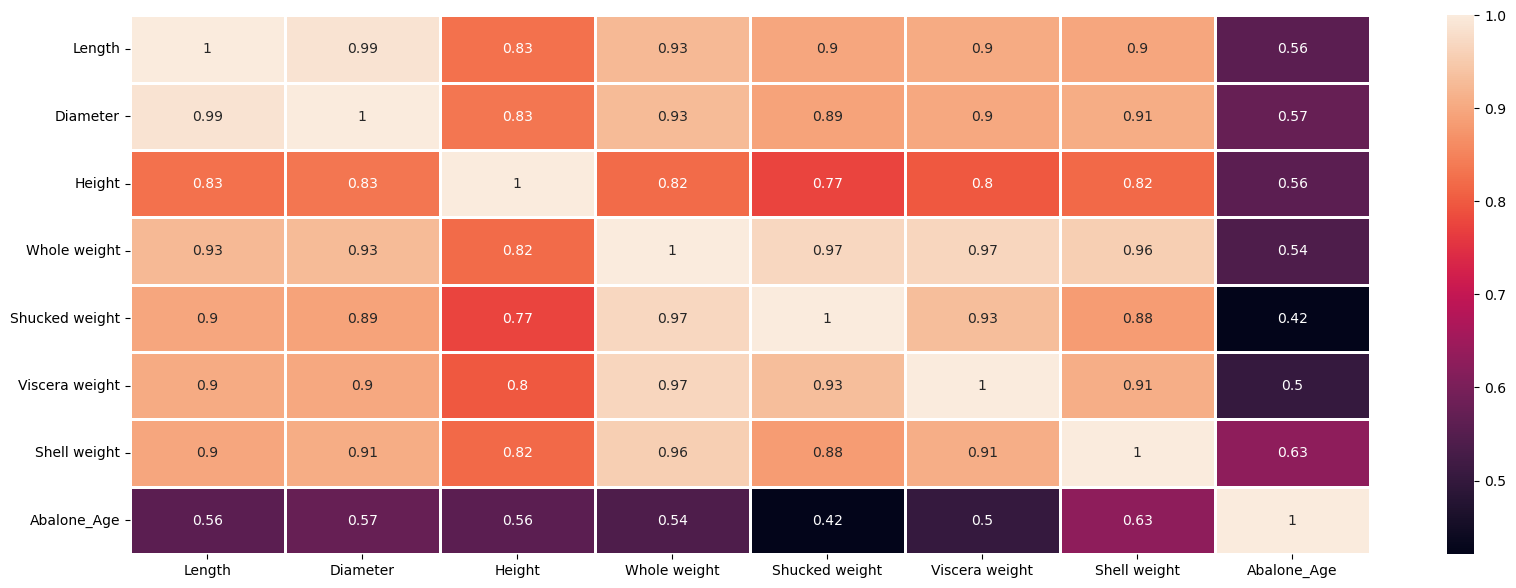

In [20]:
lw = 0.8
lc = "white"

plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True,linewidth= lw, linecolor = lc)

### 3.Multivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Abalone_Age'>

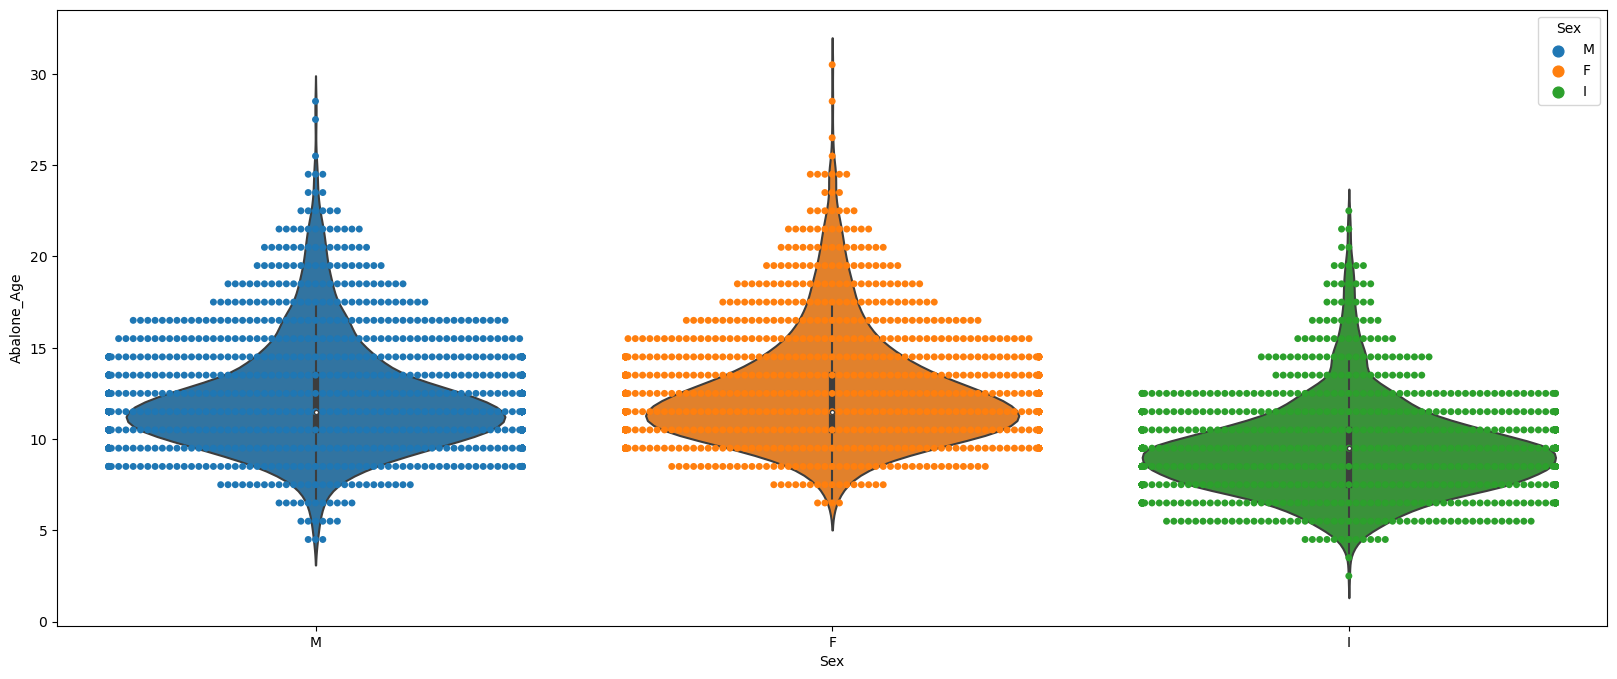

In [22]:
plt.figure(figsize = (20,8))
sns.swarmplot(x = 'Sex', y = 'Abalone_Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Abalone_Age', data = df)

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

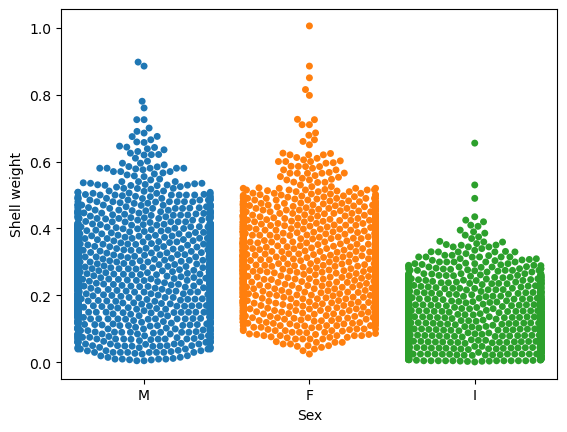

In [23]:
sns.swarmplot(x = df['Sex'], y = df['Shell weight'] )

<AxesSubplot:xlabel='Abalone_Age', ylabel='Height'>

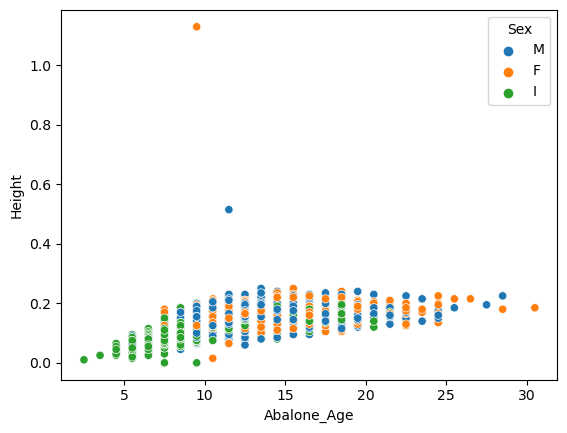

In [24]:
sns.scatterplot(x = df.Abalone_Age, y = df["Height"], hue= df["Sex"])

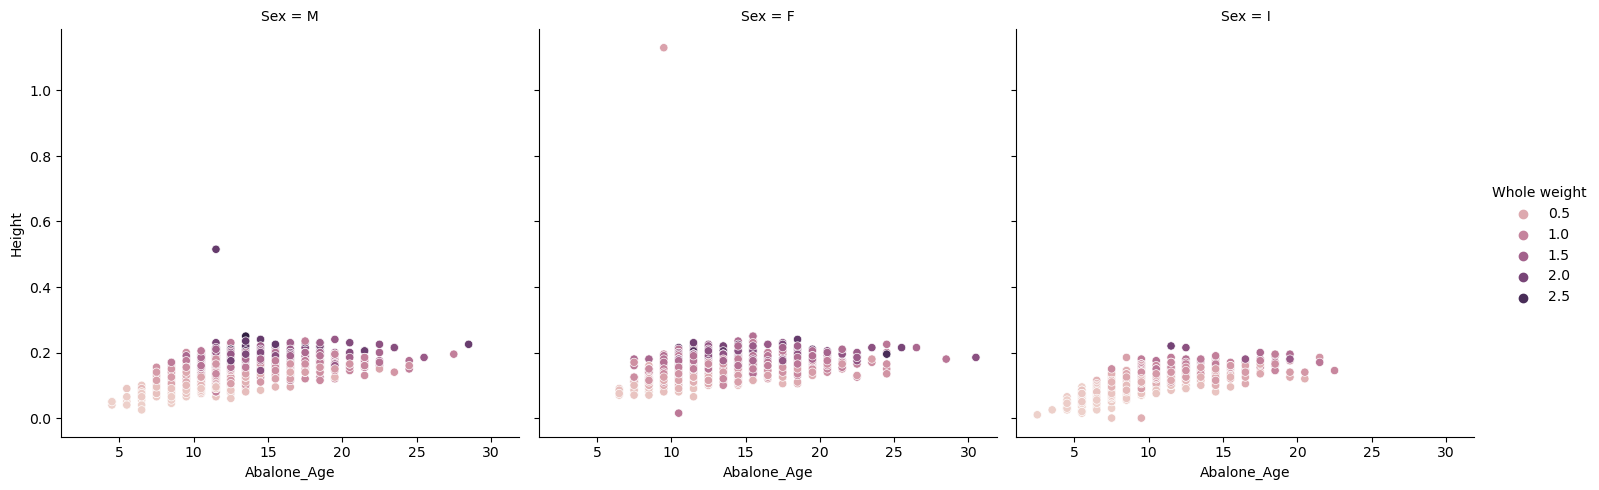

In [25]:
sns.relplot(data=df, x="Abalone_Age", y="Height", hue="Whole weight", col="Sex")

## Descriptive Statistics

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Abalone_Age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


In [27]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age']].mean().sort_values('Abalone_Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


## Checking for Missing Values

In [28]:
missing_values = df.isnull().sum().sort_values(ascending = False)

In [29]:
missing_values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Abalone_Age       0
dtype: int64

## ** Finding the Outliers and Handling Outliers**

<AxesSubplot:ylabel='Abalone_Age'>

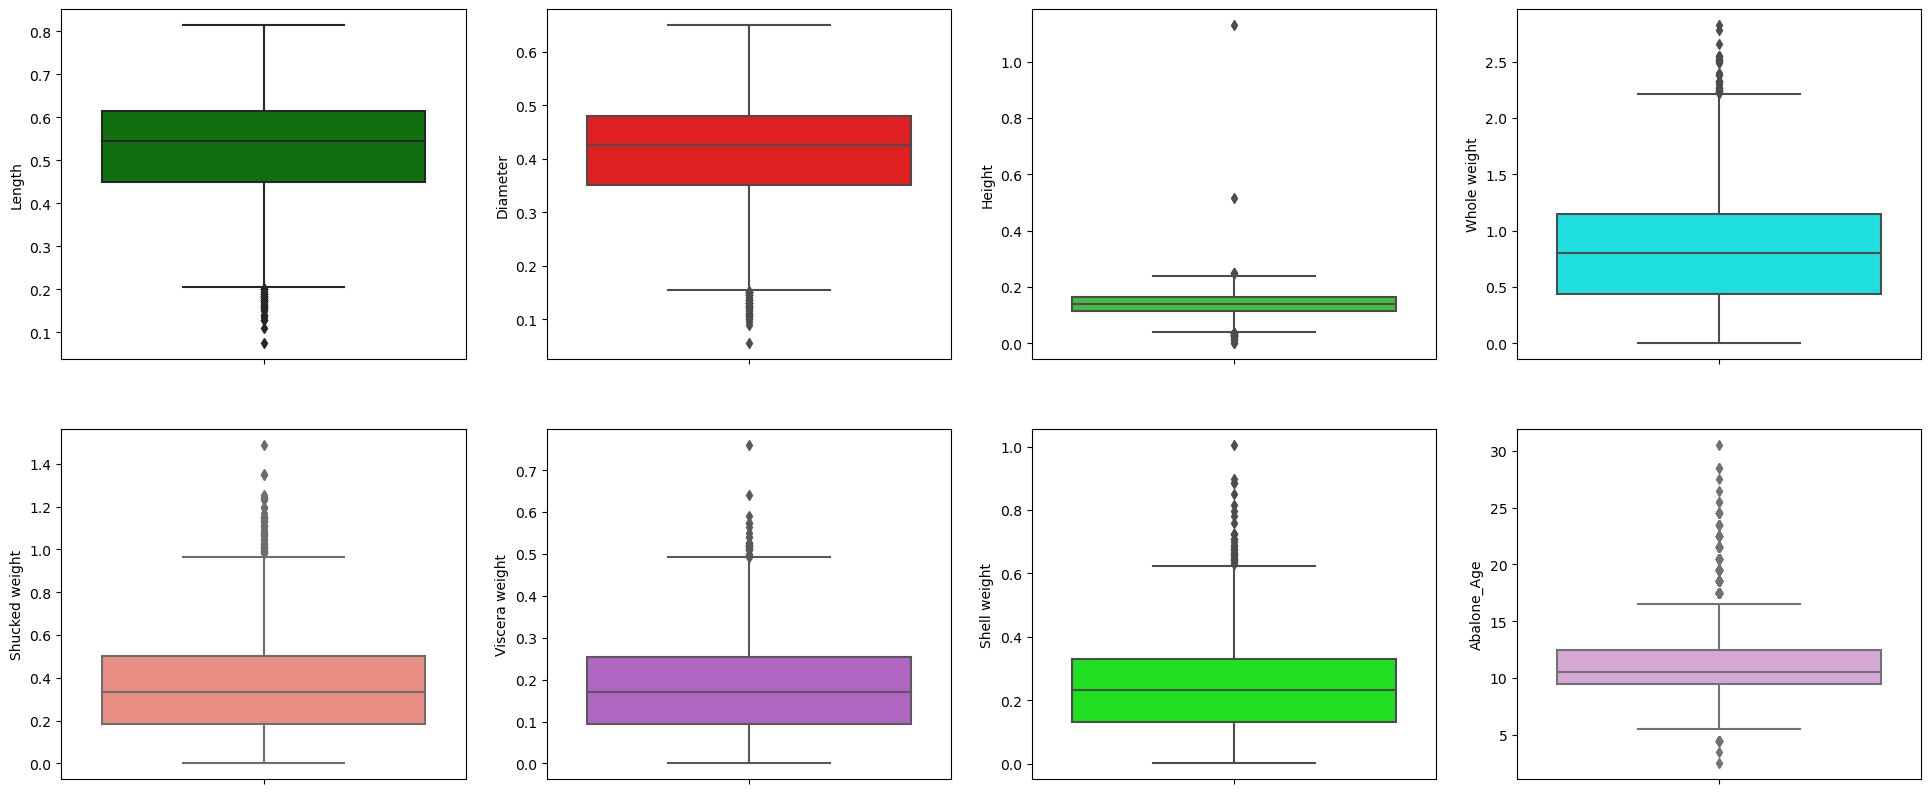

In [30]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Abalone_Age', data = df, color = 'plum')

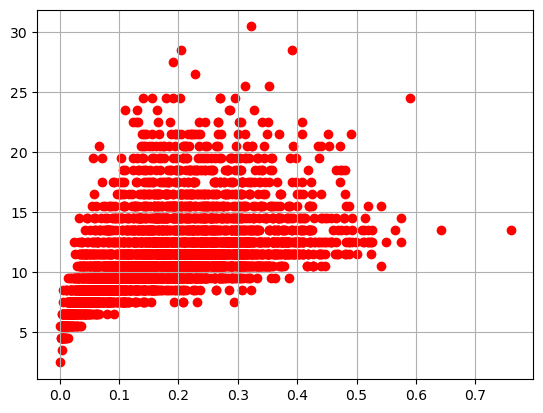

In [31]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color="red")
plt.grid(True)

In [32]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

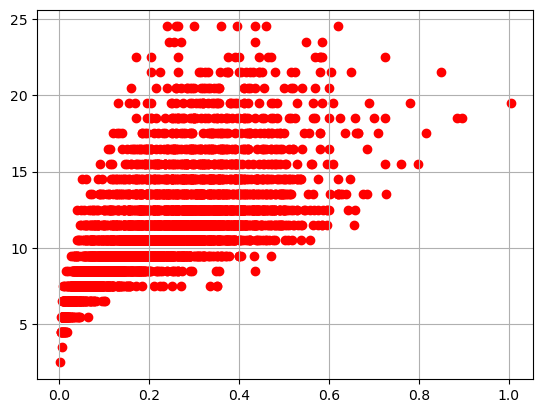

In [33]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='red')
plt.grid(True)

In [34]:
df.drop(df[(df['Shell weight']> 0.6) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']< 0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)

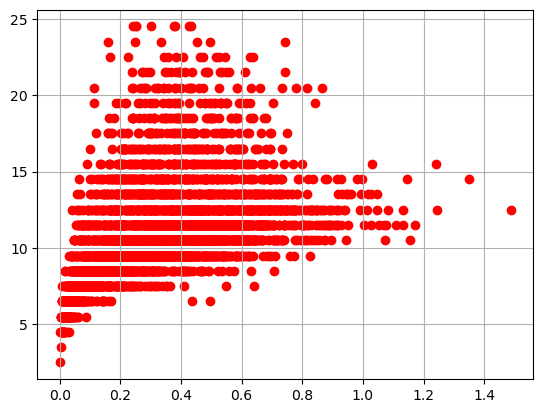

In [35]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='red')
plt.grid(True)

In [36]:
df.drop(df[(df['Shucked weight']>= 1) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Abalone_Age'] > 20)].index, inplace=True)

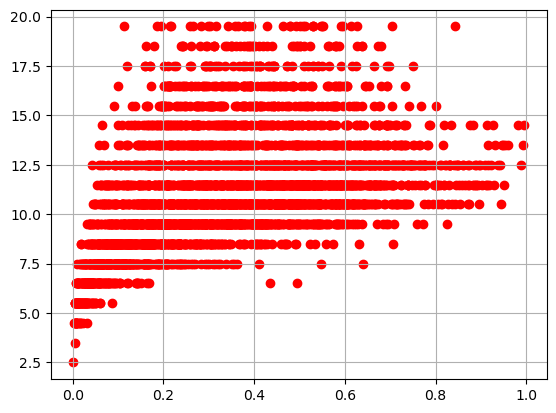

In [37]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='red')
plt.grid(True)

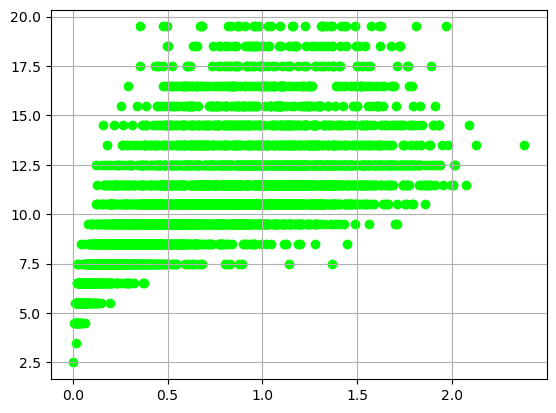

In [38]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='lime')
plt.grid(True)

In [39]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

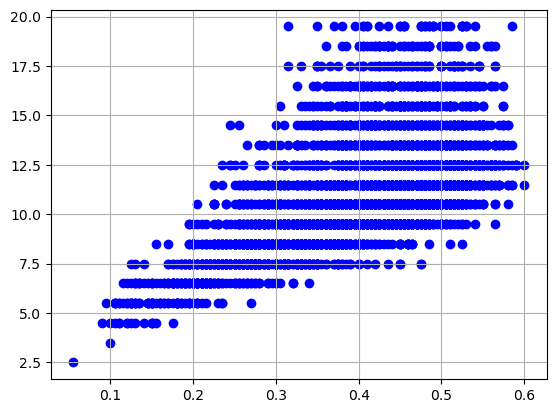

In [40]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='blue')
plt.grid(True)

In [41]:
df.drop(df[(df['Diameter']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['Abalone_Age']< 25)].index, inplace=True)

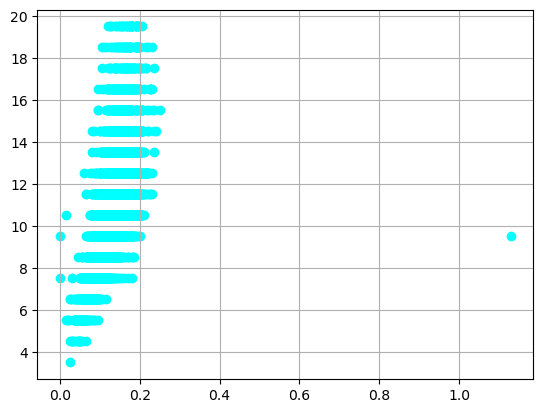

In [42]:
var = 'Height'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='cyan')
plt.grid(True)

In [43]:
df.drop(df[(df['Height']>0.4) & (df['Abalone_Age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['Abalone_Age'] > 25)].index, inplace=True)

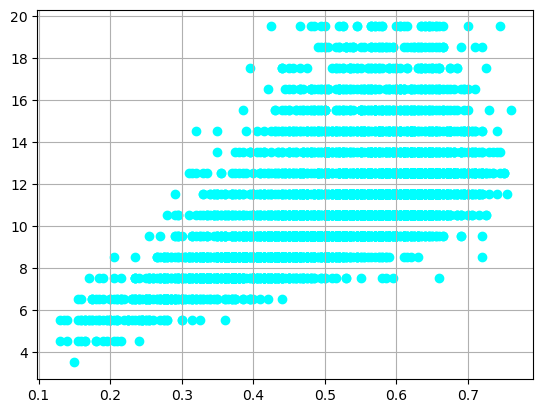

In [44]:
var = 'Length'
plt.scatter(x = df[var], y = df['Abalone_Age'], color='cyan')
plt.grid(True)

In [45]:
df.drop(df[(df['Length']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['Abalone_Age']< 25)].index, inplace=True)

In [46]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,0.518168,0.402955,0.136972,0.791814,0.345022,0.173504,0.227166,11.127284
std,0.117643,0.097127,0.037248,0.451790,0.205040,0.102633,0.125889,2.764955
min,0.130000,0.095000,0.000000,0.010500,0.004500,0.000500,0.003500,3.500000
25%,0.445000,0.345000,0.110000,0.428250,0.179250,0.090000,0.125000,9.500000
50%,0.535000,0.420000,0.140000,0.774500,0.326500,0.165000,0.223500,10.500000
75%,0.610000,0.475000,0.165000,1.123750,0.491500,0.245000,0.315250,12.500000
max,0.760000,0.590000,0.250000,2.381000,0.995500,0.492500,0.600000,19.500000


## Categorical Column - Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
# transform data
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## split the data into dependent and independent variables

In [49]:
X = df.iloc[:, 0:7]
Y = df['Abalone_Age']

In [50]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395


In [51]:
Y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Abalone_Age, dtype: float64

## Scale the independent variables

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## Split the data into training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 1)

## Build the Model

In [55]:
#importing all the neccessary models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

## Measure the performance using Metrics

### Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
#Testing the model
lr_test_pred = lr.predict(x_test)
lr_test_pred

array([11.74521622, 11.00935228, 12.12055972, 10.15149525, 10.01067977,
       12.22311935, 10.00061118, 13.90349336, 11.04962003, 12.0868392 ,
       11.49256124, 12.4720925 ,  8.3037987 , 13.02635846, 12.16376192,
       12.03042023, 14.72245275,  9.70775432, 10.50120925, 16.89777358,
       12.82778358, 10.11515436,  8.98681418, 11.61141449, 11.82029329,
       10.43459842, 13.91663738,  9.99226635, 12.69805069, 13.39310711,
       11.07713961, 13.05790854, 10.12436369, 11.66150625, 12.5951983 ,
       11.79685943,  6.10741732, 11.18313123, 11.0430587 , 11.42535789,
        8.80751922, 11.27446128, 14.20502991, 10.63210648, 13.00588178,
       10.23306136, 10.29496195, 10.2502371 , 13.21162054, 15.81152243,
        8.65001876, 11.52209909, 11.50409364, 11.83695374, 12.58418763,
       10.10320308, 11.36525496,  8.77175711, 12.71413439, 10.95937734,
        9.99660232,  8.67224146, 13.79594167, 12.00926749, 12.71437622,
       13.7350176 ,  8.98189991, 12.7934958 ,  9.14784927,  8.06

In [58]:
#measuring the performance
mse = mean_squared_error(y_test, lr_test_pred)
print('Mean Squared error of testing Set: %2f'%mse)

Mean Squared error of testing Set: 3.937985


In [59]:
p = r2_score(y_test, lr_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.50


### Ridge

In [60]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)

Ridge(alpha=0.01, normalize=True)

In [61]:
Ridge(alpha=0.01, normalize=True)

Ridge(alpha=0.01, normalize=True)

In [62]:
#Testing the model
ridge_model_pred = ridge_mod.predict(x_test)
ridge_model_pred

array([11.69792272, 10.79287003, 12.33580623, 10.36335215, 10.35520398,
       11.95043268, 10.27911125, 13.5660439 , 11.36698644, 12.27881362,
       11.5769263 , 12.44509759,  8.25817779, 13.10409825, 12.41941852,
       12.38519677, 14.46190413,  9.82412911, 10.50240402, 15.73586748,
       12.44528102, 10.22200521,  8.99275315, 11.68358514, 11.8565137 ,
       10.53816305, 13.7292822 , 10.35953564, 12.61502364, 13.00288193,
       11.00088431, 13.09446132, 10.41954746, 11.69208542, 11.96030237,
       11.71290864,  5.92723839, 11.41344206, 11.12369602, 11.60226168,
        8.94153589, 11.52013409, 14.09753588, 10.75433115, 13.39677911,
       10.48091569, 10.67776934, 10.72425502, 12.29972937, 14.86327567,
        8.667949  , 11.56606706, 11.51466801, 11.7473642 , 12.33968127,
       10.62627252, 11.47064522,  8.76025712, 12.23775799, 10.8831927 ,
       10.07062121,  8.7061606 , 13.04314946, 12.18042402, 12.78002082,
       13.50737738,  8.93643644, 12.64843943,  9.32904871,  8.04

In [63]:
#Measuring the performance
acc = r2_score(y_test, ridge_model_pred)
print('Score of testing Set: %2f'%acc)

Score of testing Set: 0.493001


### Decision Tree Regression

In [64]:
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
#Testing the model
dt_test_pred = dt.predict(x_test)
dt_test_pred

array([11.5, 10.5, 13.5, 13.5, 10.5, 14.5,  8.5, 14.5, 10.5, 13.5, 14.5,
       10.5,  7.5, 12.5, 15.5, 11.5, 18.5,  7.5, 15.5, 13.5, 15.5,  9.5,
       11.5, 12.5, 11.5,  9.5, 15.5,  9.5,  9.5,  9.5, 10.5, 14.5,  7.5,
       10.5, 10.5,  9.5,  4.5,  9.5,  9.5, 12.5,  7.5, 10.5, 11.5, 10.5,
       16.5,  8.5,  9.5,  9.5, 12.5, 12.5,  8.5, 10.5, 15.5,  9.5, 11.5,
       11.5, 12.5,  9.5, 15.5, 15.5, 12.5,  8.5, 13.5, 10.5, 15.5, 14.5,
       10.5, 10.5,  7.5,  9.5, 10.5, 12.5,  7.5, 10.5, 15.5,  8.5, 10.5,
       10.5,  6.5,  6.5,  8.5,  9.5, 11.5, 10.5, 13.5, 12.5, 11.5, 18.5,
       10.5,  6.5, 12.5, 13.5,  9.5,  9.5,  6.5,  7.5, 15.5,  6.5,  8.5,
        9.5, 10.5,  9.5,  5.5,  7.5, 19.5, 10.5, 12.5, 11.5, 12.5, 13.5,
       12.5,  8.5,  9.5, 12.5, 14.5,  9.5, 12.5, 11.5, 15.5, 12.5,  8.5,
        9.5,  9.5,  7.5, 11.5,  8.5, 10.5,  7.5, 19.5, 10.5,  5.5,  9.5,
       14.5,  9.5, 10.5, 14.5,  6.5, 10.5,  4.5, 12.5, 13.5, 10.5, 12.5,
        8.5, 13.5,  8.5, 11.5, 10.5, 10.5, 18.5, 11

In [66]:
#Measuring the Performance
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f'%dacc)

Mean Squared Error of testing Set: 6.906133


### KNN Regression

In [67]:
knn = KNeighborsRegressor(n_neighbors = 3 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=3)

In [68]:
#Testing the Model
knn_test_pred = knn.predict(x_test)
knn_test_pred

array([12.5       , 10.5       , 13.83333333,  9.5       ,  9.83333333,
       15.5       ,  9.5       , 14.5       , 11.16666667, 10.16666667,
        9.5       , 12.83333333,  7.5       , 12.5       , 10.5       ,
       11.83333333, 13.5       ,  9.5       ,  9.5       , 13.83333333,
       11.5       ,  8.5       , 10.83333333, 14.16666667, 11.83333333,
        9.83333333, 12.5       ,  9.5       , 11.83333333, 14.16666667,
       10.5       , 14.83333333, 11.83333333, 11.16666667, 13.16666667,
       11.5       ,  6.5       ,  9.16666667, 11.5       , 12.5       ,
        7.83333333, 13.16666667, 12.5       ,  9.83333333, 15.5       ,
       10.5       ,  9.5       , 10.83333333, 11.83333333, 11.5       ,
        8.83333333, 11.16666667, 14.16666667, 12.16666667, 14.16666667,
       11.83333333,  9.16666667,  7.5       , 15.16666667,  9.16666667,
        9.83333333,  7.5       , 11.83333333, 11.83333333, 12.16666667,
       12.5       ,  9.16666667, 12.16666667,  9.16666667,  7.16

In [69]:
#Measuring the Performance
kacc= r2_score(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kacc)

Score of testing Set: 0.489402


In [70]:
kmse = mean_squared_error(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kmse)

Score of testing Set: 2.514393
